In [1]:
import pandas as pd

In [2]:
file = './Supporting_files/OTU.csv'
df = pd.read_csv(file)
df.head()

,#OTU ID,Sample_1,Sample_2,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,1644055,0.003676,0.008015,Archaea,Euryarchaeota,Halobacteria,Haloferacales,Unclassified Haloferacales,Unclassified Haloferacales,Unclassified Haloferacales sp.
1,1644056,0.000925,0.001805,Archaea,Euryarchaeota,Halobacteria,Haloferacales,Haloferacaceae,Unclassified Haloferacaceae,Unclassified Haloferacaceae sp.
2,60847,0.047868,0.113364,Archaea,Euryarchaeota,Halobacteria,Haloferacales,Haloferacaceae,Halogeometricum,Halogeometricum borinquense
3,2251,0.003226,0.008231,Archaea,Euryarchaeota,Halobacteria,Haloferacales,Haloferacaceae,Haloferax,Haloferax sp.
4,35746,0.003251,0.006643,Archaea,Euryarchaeota,Halobacteria,Haloferacales,Haloferacaceae,Haloferax,Haloferax gibbonsii


In [21]:
df.Kingdom.unique()

array(['Archaea', 'Bacteria', 'Eukaryota_fungi', 'Eukaryota_protozoa',
       'Viruses'], dtype=object)

In [8]:
df.shape

(14511, 10)

<Axes: >

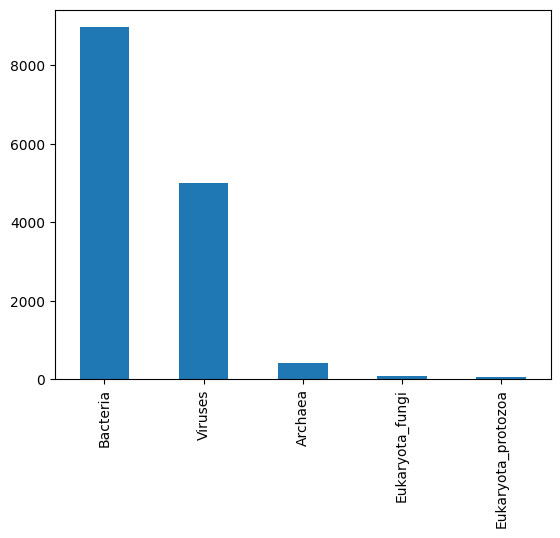

In [13]:
df['Kingdom'].value_counts().plot(kind='bar')

<Axes: >

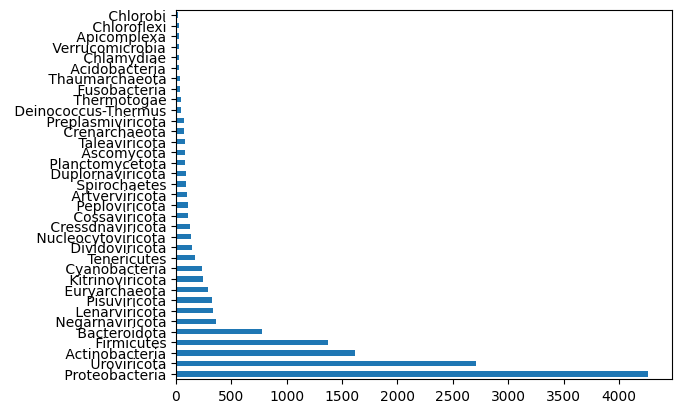

In [25]:
df['Phylum'].value_counts()[:35].plot(kind='barh')

In [35]:
for col in df.columns[3:]:
    print(df[col].value_counts()[:20])
    print('\n\n')

Bacteria              8967
Viruses               4993
Archaea                408
Eukaryota_fungi         95
Eukaryota_protozoa      48
Name: Kingdom, dtype: int64



 Proteobacteria        4265
 Uroviricota           2706
 Actinobacteria        1620
 Firmicutes            1373
 Bacteroidota           773
 Negarnaviricota        362
 Lenarviricota          330
 Pisuviricota           327
 Euryarchaeota          286
 Kitrinoviricota        245
 Cyanobacteria          236
 Tenericutes            168
 Dividoviricota         149
 Nucleocytoviricota     139
 Cressdnaviricota       129
 Cossaviricota          113
 Peploviricota          112
 Artverviricota         100
 Spirochaetes            94
 Duplornaviricota        93
Name: Phylum, dtype: int64



 Caudoviricetes                2706
 Gammaproteobacteria           2057
 Actinomycetia                 1551
 Alphaproteobacteria           1177
 Bacilli                        911
 Betaproteobacteria             682
 Flavobacteriia             

<Axes: >

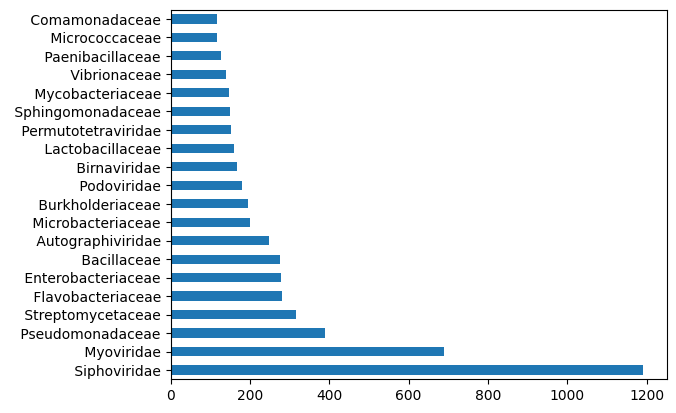

In [23]:
df['Family'].value_counts()[:20].plot(kind='barh')

<Axes: >

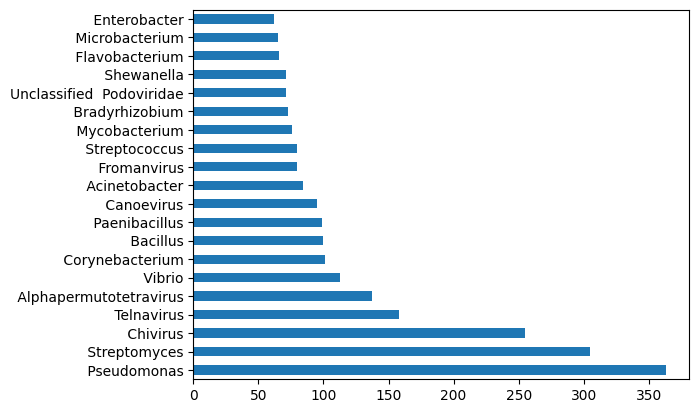

In [24]:
df['Genus'].value_counts()[:20].plot(kind='barh')

In [25]:
df[df.Kingdom=='Bacteria'][['Sample_1'] + list(df.columns[3:])]

,Sample_1,Kingdom,Phylum,Class,Order,Family,Genus,Species
408,0.021708,Bacteria,Actinobacteria,Actinomycetia,Corynebacteriales,Unclassified Corynebacteriales,Unclassified Corynebacteriales,Unclassified Corynebacteriales sp.
409,0.016731,Bacteria,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae,Unclassified Mycobacteriaceae,Unclassified Mycobacteriaceae sp.
410,0.013330,Bacteria,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae,Mycobacterium,Mycobacterium sp.
411,22.744919,Bacteria,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae,Mycobacterium,Mycobacterium canettii
412,0.007128,Bacteria,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae,Mycobacterium,Mycobacterium tuberculosis
...,...,...,...,...,...,...,...,...
9370,0.000000,Bacteria,Thermotogae,Thermotogae,Thermotogales,Unclassified Thermotogales,Unclassified Thermotogales,Unclassified Thermotogales sp.
9371,0.000000,Bacteria,Thermotogae,Thermotogae,Thermotogales,Fervidobacteriaceae,Unclassified Fervidobacteriaceae,Unclassified Fervidobacteriaceae sp.
9372,0.000000,Bacteria,Thermotogae,Thermotogae,Kosmotogales,Kosmotogaceae,Mesotoga,Mesotoga sp.
9373,0.000000,Bacteria,Nitrospirae,Nitrospira,Nitrospirales,Nitrospiraceae,Unclassified Nitrospiraceae,Unclassified Nitrospiraceae sp.


In [28]:
df[df.Kingdom=='Bacteria'][['Sample_2'] + list(df.columns[4:])].to_csv('sample2.tsv', sep='\t', index=False, header=False)

In [10]:
['Sample_1'] + list(df.columns[3:])

['Sample_1',
 'Kingdom',
 'Phylum',
 'Class',
 'Order',
 'Family',
 'Genus',
 'Species']

In [38]:
df.groupby('Kingdom')['Sample_1', 'Sample_2'].sum().sort_values('Sample_1', ascending=False).to_excel('kingdom_dist.xlsx')

/tmp/ipykernel_37005/195484580.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Kingdom')['Sample_1', 'Sample_2'].sum().sort_values('Sample_1', ascending=False).to_excel('kingdom_dist.xlsx')


In [40]:
df.shape

(14511, 10)

In [69]:
s1 = df[df.Sample_1>0].iloc[:, [1,3,4,5,6,7,8,9]]
s1.insert(0, value=['sample1']*s1.shape[0], column='sample')
s1.rename({'Sample_1': 'freq'}, axis=1, inplace=True)
s1.head()

,sample,freq,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,sample1,0.003676,Archaea,Euryarchaeota,Halobacteria,Haloferacales,Unclassified Haloferacales,Unclassified Haloferacales,Unclassified Haloferacales sp.
1,sample1,0.000925,Archaea,Euryarchaeota,Halobacteria,Haloferacales,Haloferacaceae,Unclassified Haloferacaceae,Unclassified Haloferacaceae sp.
2,sample1,0.047868,Archaea,Euryarchaeota,Halobacteria,Haloferacales,Haloferacaceae,Halogeometricum,Halogeometricum borinquense
3,sample1,0.003226,Archaea,Euryarchaeota,Halobacteria,Haloferacales,Haloferacaceae,Haloferax,Haloferax sp.
4,sample1,0.003251,Archaea,Euryarchaeota,Halobacteria,Haloferacales,Haloferacaceae,Haloferax,Haloferax gibbonsii


In [131]:
data = pd.concat([s1, s2]).reset_index(drop=True)


In [173]:
tst = data.groupby(['sample', 'Kingdom', 'Phylum'], as_index=False)['freq'].sum()
tst['freq'] = tst.groupby(['sample', 'Kingdom',])['freq'].transform(lambda x: (x / x.sum()) * 100)
tst['freq'] = tst.freq.round(1) #.astype(int)
tst = tst[tst.freq > 0]
# tst

In [174]:
tst['Phylum'] = tst.Phylum + '(' + tst.freq.astype(str) + '%)'
# tst

In [175]:
tst.to_excel('res1.xlsx')

In [176]:
phylum_order = tst.groupby('Phylum')['freq'].max().sort_values(ascending=False).index
tst['Phylum'] = pd.Categorical(tst['Phylum'], categories=phylum_order, ordered=True)

# Sort the DataFrame by 'freq' in descending order within each group
tst.sort_values(['sample', 'Kingdom', 'freq'], ascending=[True, True, False], inplace=True)

# Group by 'sample' and 'Kingdom', then aggregate 'Phylum' using a custom join function
def custom_join(series):
    return ', '.join(series)

result = tst.groupby(['sample', 'Kingdom'])['Phylum'].agg(custom_join).reset_index()

# Print the result
print(result)
result.to_excel('res2.xlsx')

    sample             Kingdom  \
0  sample1             Archaea   
1  sample1            Bacteria   
2  sample1     Eukaryota_fungi   
3  sample1  Eukaryota_protozoa   
4  sample1             Viruses   
5  sample2             Archaea   
6  sample2            Bacteria   
7  sample2     Eukaryota_fungi   
8  sample2  Eukaryota_protozoa   
9  sample2             Viruses   

                                              Phylum  
0   Euryarchaeota(79.4%),  Crenarchaeota(8.5%),  ...  
1   Actinobacteria(48.5%),  Proteobacteria(23.5%)...  
2            Ascomycota(99.4%),  Basidiomycota(0.6%)  
3   Apicomplexa(62.2%),  Euglenozoa(15.2%),  Baci...  
4   Uroviricota(98.9%),  Nucleocytoviricota(0.4%)...  
5   Euryarchaeota(83.4%),  Crenarchaeota(6.9%),  ...  
6   Actinobacteria(36.5%),  Proteobacteria(33.0%)...  
7   Ascomycota(94.8%),  Basidiomycota(5.1%),  Mic...  
8   Apicomplexa(53.8%),  Bacillariophyta(17.8%), ...  
9   Uroviricota(89.6%),  Dividoviricota(2.3%),  N...  


In [177]:
tst.to_excel('res.xlsx')

In [158]:
tst['Phylum'] = tst.Phylum + '(' + tst.freq.astype(str) + '%)'
tst.groupby(['sample', 'Kingdom'], as_index=True)['Phylum'].agg(lambda x: ', '.join(x)).reset_index()

,sample,Kingdom,Phylum
0,sample1,Archaea,"Candidatus Lokiarchaeota(1%), Candidatus The..."
1,sample1,Bacteria,"Actinobacteria(48%), Bacteroidota(17%), Cya..."
2,sample1,Eukaryota_fungi,"Ascomycota(99%), Basidiomycota(1%)"
3,sample1,Eukaryota_protozoa,"Apicomplexa(62%), Bacillariophyta(11%), Cer..."
4,sample1,Viruses,Uroviricota(99%)
5,sample2,Archaea,"Candidatus Lokiarchaeota(1%), Candidatus The..."
6,sample2,Bacteria,"Actinobacteria(37%), Bacteroidota(14%), Cya..."
7,sample2,Eukaryota_fungi,"Ascomycota(95%), Basidiomycota(5%)"
8,sample2,Eukaryota_protozoa,"Apicomplexa(54%), Bacillariophyta(18%), Cer..."
9,sample2,Viruses,"Dividoviricota(2%), Negarnaviricota(1%), Nu..."


In [154]:
tst['Phylum'] = tst.Phylum + '(' + tst.freq.astype(str) + '%)'

1          Candidatus Lokiarchaeota(1%)
4       Candidatus Thermoplasmatota(3%)
5                     Crenarchaeota(9%)
6                    Euryarchaeota(79%)
7                    Thaumarchaeota(8%)
9                   Actinobacteria(49%)
13                    Bacteroidota(17%)
27                    Cyanobacteria(1%)
33                       Firmicutes(6%)
40                  Proteobacteria(23%)
41                     Spirochaetes(3%)
47                      Ascomycota(99%)
48                    Basidiomycota(1%)
50                     Apicomplexa(63%)
51                 Bacillariophyta(11%)
52                         Cercozoa(6%)
54                      Euglenozoa(15%)
55                           Evosea(5%)
73                    Uroviricota(100%)
75         Candidatus Lokiarchaeota(1%)
78      Candidatus Thermoplasmatota(2%)
79                    Crenarchaeota(7%)
80                   Euryarchaeota(84%)
81                   Thaumarchaeota(6%)
83                  Actinobacteria(37%)


In [127]:
tst.to_excel('phyl.dist.xlsx')

In [ ]:
grouped_df = df.groupby(['sample', 'Kingdom'])['Phylum', 'freq'].apply(lambda x: [(phylum, f'{freq:.2f}%') for phylum, freq in zip(x['Phylum'], x['freq'])]).reset_index(name='Phylums')

# Merge the percentages into a single cell
grouped_df['Phylums'] = grouped_df['Phylums'].apply(lambda x: ', '.join([f'({phylum} {freq})' for phylum, freq in x]))

# Drop unnecessary columns
grouped_df = grouped_df.drop(['Kingdom', 'freq'], axis=1)

# Display the resulting DataFrame
print(grouped_df)